# Root Finding 

## Overview, Objectives, and Key Terms
 
In [Lecture 19](ME400_Lecture_19.ipynb), SymPy was applied to perform symbolic differentuation, and in [Lecture 21]( ME400_Lecture_21.ipynb), finite-difference approximations were developed to perform numerical differentiation.  We'll need both techniques as we begin to solve **nonlinear equations** and **optimization problems**.  Both subjects are rich, so we'll touch on only the basics, but you'll have tools at your disposal to tackle such problems in varied applications.
 
### Objectives

By the end of this lesson, you should be able to

- Find one or more roots of a one-dimensional, nonlinear equation $f(x) = 0$ using the bisection and Newton methods.
- Find local extrema of a function $f(x)$ using the bisection and Newton methods.
- Use `fsolve` to solve nonlinear systems.
- Use `minimize` to solve nonlinear optimization problems.

### Key Terms

- nonlinear equation
- transcendental equation
- graphical solution
- bisection method
- Newton's method
- quadratic convergence
- second-order convergence
- order of convergence
- secant method
- Steffensen's method
- nonlinear systems
- Jacobian matrix
- `scipy.optimize.fsolve`
- optimization
- extremum
- critical point
- objective function
- `scipy.optimize.minimize`

## Nonlinear Equations

Linear equations are characterized by *linear combinations* or the unknowns.  For example, the system of equations for $x$ and $y$

$$
\begin{split}
 ax + by &= 1 \\
 cx + dy &= 2 
\end{split}
$$

is linear because $x$ and $y$ appear with only constant coefficients.  There are no $x^2$ terms, or $\sin(y)$ terms.  Just multiples of $x$ and $y$.  Any deviation from this pattern results in **nonlinear equations**.  For example, quadratic equation $ax^2 + bx + c = 0$ is nonlinear, and we know how to find the **roots** of this equations.  A root is the solution $x$ to any equation (generally, nonlinear) $f(x) = 0$.  Our goal now is to solve such equations using the tools at our disposal.

### Analytic Solutions

In rare cases, nonlinear equations have closed-form solutions (i.e., you can write it down explicitly).  The quadratic equation is one example.  In fact, solutions exist for the general cubic (add a $x^3$ term) and quartic (add both $x^3$ and $x^4$).  The roots are hideous (compared to the quadratic equation roots), but they are known.  

***

**Exercise**: Use SymPy to find the roots of the cubic equation $ax^3 + bx^2 + cx + d = 0$.  Can it also find roots to *quintic* equation $ax^5 + bx^4 + cx^3 + dx^2 + ex + f = 0$?

*Solution*:  The cubic is easy, but SymPy can't do the quintic.  In fact, the roots to general polynomials of degree 5 and higher cannot be determined explicity, a fact [proven by Abel](https://en.wikipedia.org/wiki/Abel%E2%80%93Ruffini_theorem).

***

For other problems, we often have to have a bit of luck.

***
**Exercise**:  Find all values of $x$ such that $\sin(ax) - b = 0$.

*Solution*: The equation has no solution if $|b| > 1$ (because $-1 \leq  \sin(ax) \leq 1$).  If $|b| \leq 1$, then $x = \frac{\sin^{-1}b}{a} + n\pi$ for $n = 0, \pm 1, \pm 2, \ldots$.  Such an equation is called **transcendental** because it involves a transcendental function (i.e., $\sin(x)$).  Transcendental functions cannot be defined in terms of polynomial of finite degree; in other words, if one needs an infinitely long [Taylor series](ME400_Lecture_20.ipynb) to represent the function, it is transcendental.  Transcendental equations almost always require some form of numerical evaluation.

**Exercise**: Solve the nonlinear system of equations $y - x = 4$ and $x^2 + y = 3$.

***

### Graphical Solutions

When analytic methods fail, solutions  (albeit, approximate)  to nonlinear equations may be found **graphically**.  For single equation in $x$, it suffices to plot $f(x)$ over the range of interest and identify the roots.

***

**Exercise**:  Revisit $\sin(ax) - b$ for $a=1$ and $b=1/4$ and find all roots between $x = -5$ and $x = 5$.

*Solution*:


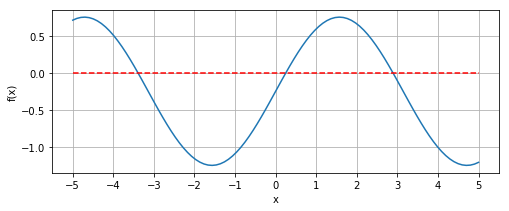

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-5, 5, 100)
ax = plt.figure(1, (8,3)).gca()
plt.plot(x,  np.sin(x)-0.25, x, 0*x,'r--')
plt.xlabel('x')
plt.ylabel('f(x)')
ax.set_xticks(np.arange(-5, 6, 1))
plt.grid(True)
plt.show()

Because `plt.plot` does not by default draw a line for $y=0$, a dashed, red line is superimposed to provide more obvious intersections between the function $f(x)$ and the horizontal axis $y = 0$.  It appears (from inspections) that the roots of interest are near -3.5, 0.3, and 2.8.  One could certainly zoom in somewhat to improve the precision of the estimates, but arbitrary precision will require other techniques.

***

**Exercise**:  A simple, somewhat realistic model of a spherical nuclear reactor consists of two  regions: (1) an inner spherical volume of *fuel* of radius $R$, in which neutrons induce fission, leading to energy release and additional neutrons, and (2) an outer, infinitely large *reflector* surrounding the fuel, which minimizes the number of neutrons that escape the fuel.  The reactor is *critical* if the number of neutrons produced and lost is constant over time.  For this simple, two region model, the condition for criticality is

$$
  BR \cot(BR) = 1 - \frac{D_r}{D_f} \left ( \frac{R}{L_r} + 1 \right ) \, ,
$$

where $D_f$, $D_r$, and $L_r$ are fixed, material properties of the fuel and reflector.  Hence, in order for this criticality condition to be satisfied, an appropriate value of $B$ must be determined.  Here, $B$ is called the *buckling* and is a function of several fuel material properties.  For $R=20$, $D_f = 0.9$, $D_r = 1.1$, and $L_r =  1.7$, estimate the first positive value of $B$ that satisfies the condition.

***

**Exercise**: The solution of transient heat-conduction problems often involves a technique called *separation of variables*.  Application of this technique to an infinite slab of thickness $2L$ subject to certain initial and boundary conditions leads to the transcendental equation

$$
  \cot \lambda L = \frac{\lambda L}{hL/k} = \frac{\lambda L}{\text{Bi}} \, ,
$$

where $\lambda$ is a dimensionless, undetermined parameter, $h$ is the heat transfer coefficient, $k$ is the thermal conductivity, and $\text{Bi}$ is the *Biot number*.  The Biot number quantifies how hard it is for heat to flow *within* a body relative to how hard it is to flow *through the outer surface* of the body.  Only for certain values of $\lambda$ can the equation be solved. Determine these values graphically by plotting the left-hand and right-hand sides of the equation as functions of $\lambda L$.

***

## Determining Roots Numerically

The numerical solution of $f(x) = 0$ can be challenging since it requires we know at least a little about the desired solution, particularly the range in which the root is contained. We'll explore three basic schemes for solving $f(x)$: the [bisection method](http://mathworld.wolfram.com/Bisection.html), [Newton's method](http://mathworld.wolfram.com/NewtonsMethod.html), and the secant method.

### Bisection

Application of bisection to finding a root of $f(x)$ requires a key piece of information: a range $x \in [L, R]$ in which a *single* root lives.  The algorithm is actually quite similar to [binary search](ME400_Lecture_14).   A central point $C$ is selected, and the function is evaluated at that point.  Then, if $f(C)$ has the same *sign* (i.e., $+$ or $-$) as $f(A)$, we know that the root must be between $C$ and $B$.  Why?  If there is only one root $x^*$ between $L$ and $R$, then $f(x)$ must have a constant sign for $x \in [A, x^*)$  and the opposite sign for $x \in (x^*, B]$.  If, instead, $f(x)$ changes signs between $x=A$ and $x=x^*$ then it *must* cross the $x$ axis, at which point there *must* be a second root.  

***
**Exercise**: Write a `lambda` function for $x$ that returns `True` if $x \geq 0$ and `False` otherwise.
***


An important difference between bisection and binary search is that now the search can require an unlimited number of comparisons because the search range $[A, B]$ is split in half repeatedly until a root is *converged* to within a desired tolerance $\tau$.  In other words, roots will very rarely be found *exactly*; rather, we often must accept *approximate* values, as was first introduced in [Lecture 8](ME400_Lecture_8). 

In pseudocode, the bisection method can be written as follows (where the notation from binary search is adopted as closely as is reasonable):

```
'''Bisection method for finding an isolated root of f between a and b'''
Input: f, a, b, tau

# Define the left and right boundaries
Set L = a
Set R = b

# Define the central point
Set C = (a+b)/2

# Go until f(C) is close enough to zero (i.e., that
# C is close enough to the root between a and b
While |f(C)| > tau 
    If sign(f(C)) == sign(f(L)) then
        # the root must be between C and R
        L = C
    Otherwise
        # the root must be between L and C
        R = C
    C = (L+R)/2
Output: C
```

Application of this algorithm to find the first positive root of $\sin(x) - 2/5$ is shown graphically below for the first two iterations.  At each step, the search space is reduced by half, illustrated by the shrinking highlighted rectangles.  By the second iteration, $C = 0.375$, which is visually quite close to the root of interest $x = \sin^{-1}(2/5) \approx 0.4115$.

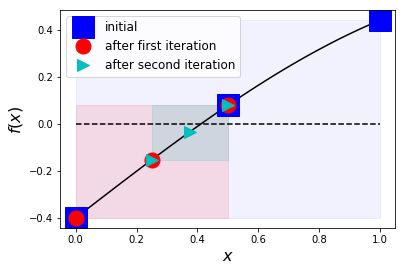

In [2]:
import nonlinear_plots
nonlinear_plots.bisection_root()

***

**Exercise**: Apply the bisection algorithm *by hand* to solve $f(x) = x^3 + 2x^2 - 5x - 6 = 0$ for $x\in [1, 4]$.  Find the root to within $\tau = 10^{-1}$.  Write out all values of $L$, $R$, $C$, and $f(C)$ for each step.

***

**Exercise**: Implement the bisection algorithm in Python  and use it to solve $\sin(x) - 2/5$ for $x \in [0, 1]$.

***

**Exercise**: Modify the bisection algorithm to accept a desired number of iterations $n$ instead of the tolerance $\tau$.  Implement this modified algorithm in Python.  Then, show the error in the approximate root of $f(x) = \sin(x) - 2/5$ for $x\in [0, 1]$ as a function of $n$.

***

### Newton's Method

A more power way to find roots of $f(x) = 0$ is [Newton's method](http://mathworld.wolfram.com/NewtonsMethod.html), sometimes called the Newton-Raphson method.  Like bisection,  Newton's method produces a sequence of approximations for a root.  The values of the sequence are increasingly close to the root.  Unlike bisection, Newton's method requires not a range in which a single root lives but an initial guess for what the root is.  

Let the root of interest be $x_r$.  Assume we have a good way to guess the root (intuition, a graph, etc.), and call that initial approximation $x_0$.  Then, for some $\Delta$, $x_r = x_0 + \Delta$,Taylor series provides the following relationship:

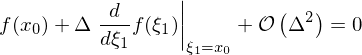

In [3]:
import sympy as sy
sy.init_printing()
f, x_0, Delta = sy.symbols('f x_0 Delta')
x_r = x_0 + Delta
sy.Eq(sy.series(f(x_r), Delta, 0, 2), 0)

Formally, this equation is still exact because $\mathcal{O}(\Delta^2)$ captures *all* terms proportional to $\Delta^2$ and higher powers of $\Delta$.  However, if $\Delta$ were small enough that the $\Delta^2$ terms can be ignored (i.e., our guess $x_0$ were close enough to $x_r$), then we're left with the *approximate* relationship

$$
  f(x_r) = 0 \approx f(x_0) + \Delta f'(x_0) \, ,
$$

from which it follows that

$$
 \Delta =  -\frac{f(x_0)}{f'(x_0)} \, .
$$

We expect $x_1 = x_1 + \Delta$ to be a *better* approximation than $x_0$.  Moreover, the same process can be applied to determine a sequence of estimated roots $x_2$, $x_3$, and so on.  This process is Newton's method, and is presented in the following pseudocode:

```
'''Newton's method for finding the root f given x_0'''
Input: f, fp, x_0, tau
Set x = x_0
While |f(x)| > tau do
   # Compute the Newton "step" 
   Set Delta = -f(x)/fp(x)
   # Compute the next value of x
   Set x = x + Delta
Output: x
```

***

**Exercise**: Apply Newton's method *manually* to solve $f(x) = x^3 + 2x^2 - 5x - 6 = 0$ to within $\tau = 10^{-5}$. Use $x_0 = 3/2$. Write out $n$, $x_n$, $f(x_n)$, $f'(x_n)$ at each step $n = 0, 1, \ldots$.

*Solution*:

```
n x                       f(x)       f'(x)
0 1.5000000000000000e+00 -5.625e+00  7.750e+00
1 2.2258064516129030e+00  3.807e+00  1.877e+01
2 2.0229637924064581e+00  3.487e-01  1.537e+01
3 2.0002760690096917e+00  4.142e-03  1.500e+01
4 2.0000000406383567e+00  6.096e-07  1.500e+01
5 2.0000000000000009e+00  1.421e-14  1.500e+01
```
***

The exercise above illustrates an important feature of Newton's method. Once Newton's method "get's going," the number of correct digits usually *doubles* at each step.  For example, step 3 got 3 digits right, while step 4 got 7, and step 5 got 15.  That's pretty quick convergence.  

Such convergence is called **quadratic convergence** or **second-order convergence**.  In other words, if the error is $\epsilon_n$ at step $n$, the error at step $n+1$ will be $\epsilon_{n+1} = a \epsilon_n^2$ for some constant $a$.  More generally, the **order of convergence** of a method is the value of $p$ for which $\epsilon_{n+1} = c\epsilon_{n}^p$ for some constant $c$.

***

**Exercise**:  Use the last three values of $x$ in the last exercise to estimate the order of convergence of Newton's method.

*Solution*:  Using logarithms, we have $\log \epsilon_4 = p \log \epsilon_3 + \log c$ and $\log \epsilon_5 = p \log \epsilon_4 + \log c$.  Those are two equations for the two unknowns $p$ and $\log c$.  Now, recalling what we learned in [Lecture 4](ME400_Lecture_4.ipynb), this system is easy to solve:

In [4]:
e_3 = 2.0002760690096917e+00-2
e_4 = 2.0000000406383567e+00-2
e_5 = 2.0000000000000009e+00-2
import numpy as np
A = np.array([[np.log(e_3), 1], [np.log(e_4), 1]])
b = np.array([np.log(e_4), np.log(e_5)])
p = np.linalg.solve(A, b)[0]
p

That's pretty darn close to 2, and Newton's method is therefore confirmed to exhibit second-order convergence (for this problem).

***


Knowledge of a method's order of convergence is useful when verifying its implementation.  If we saw less than second-order convergence for the exercise above, then the implementation might be suspect.

### Secant Method

If we don't know the derivative of $f(x)$, then Newton's method can't be used.  Of course, the bisection method is one option, but we can adapt Newton by leveraging the finite-difference methods from [Lecture 21](ME400_Lecture_21.ipynb).  The result is the **secant method**.  The algorithm is nearly identical to Newton's method, but $f'(x)$ is approximated when needed.  The classical secant method begins with two values of $x$ and the corresponding function values.  The finit

```
'''Secant method for finding the root f given x_0'''
Input: f, x_0, tau
Set x = x_0
Set x_0 = x - tau
While |f(x)| > tau do
   # Approximate the derivative
   Set fp = (f(x)-f(x_0))/(x-x_0)
   # Compute the Newton "step"
   Set Delta = -f(x)/fp
   # Store old x, and compute next value
   Set x_0 = x
   Set x = x + Delta
Output: x
```

***

**Exercise**: Apply the secant method *manually* to solve $f(x) = x^3 + 2x^2 - 5x - 6 = 0$ to within $\tau = 10^{-5}$. Use $x_0 = 3/2$. Write out $n$, $x_n$, $f(x_n)$, $f'(x_n)$ at each step $n = 0, 1, \ldots$.  How does it compare to Newton's method?

***

**Exercise**: Implement the secant method as a Python function.

***

**Exercise**: Implement a function `newton(f, x_0, fp=None, tau=1e-8, delta=1e-8)` that applies Newton's method when `fp` is provided and the secant method if `fp` is not provided.  Here, `delta` is to be the step used in the finite-difference approximation to $f'(x)$.

***

**Exercise**:  Use the secant method *without* defining $f'(x)$ to solve the following equations:
  1. $\tan(x)/x^2$ for $x_0 = 1$.
  2. $s^2 = 3$ for $s_0=1.5$. (What is this doing?)
  3. $2\cosh(x/4)-x = 0$ with $x_0 = 4$.

***

**Exercise**:  Another method that can be used when the derivative is not available is [Steffensen's method](https://en.wikipedia.org/wiki/Steffensen%27s_method).  Steffensen's method produces a sequence of approximate roots according to $x_{n+1} = \frac{f(x_n + f(x_n)) - f(x_n)}{f(x_n)}$.  Try this method on nonlinear equations from the last exercise.  Does it converge quadratically like Newton's method?

***


## Solving Systems of Nonlinear Equations Numerically

The solution of nonlinear systems is considerably more challenging than single-variable equations.  However, the Newton (and secant) methods described so far are up to the challenge.  A system of nonlinear equations can be written generically as $\mathbf{f}(\mathbf{x}) = \mathbf{0}$, where the bolded names indicate vector quantities.  Whereas Newton's method for single-variables equations requires the derivative $f'(x)$, Newton's method for systems of equations requires the **jacobian matrix**.  For a system of $n$ unknows, the jacobian $\mathbf{J}$ is a square matrix defined as

$$
  \mathbf{J}(\mathbf{x}) = \begin{bmatrix}
    \frac{\partial f_0}{\partial x_0} & \frac{\partial f_1}{\partial x_0} & \ldots & \frac{\partial f_{n-1}}{\partial x_0} \\
    \frac{\partial f_0}{\partial x_1} & \frac{\partial f_1}{\partial x_1} & \ldots & \frac{\partial f_{n-1}}{\partial x_1} \\
         &     &  \ddots &  \\
    \frac{\partial f_0}{\partial x_{n-1}} & \frac{\partial f_1}{\partial x_{n-1}} & \ldots & \frac{\partial f_{n-1}}{\partial x_{n-1}} 
\end{bmatrix}
$$

where $x_i$ indicates the $i$th unknown (or element $i$ of $\mathbf{x}$).

Then, Newton's method leads to the sequence

$$ 
  \mathbf{x}_{n+1} = \mathbf{x}_{n} - \mathbf{J}^{-1}(\mathbf{x}_n) \mathbf{f}(\mathbf{x}_n) \, .
$$

Here, $\mathbf{f}(\mathbf{x}_n)$ and $\mathbf{J}(\mathbf{x}_n)$ indicate the function and its jacobian are evalaluated at $\mathbf{x}_n$. 

***

**Exercise**:  Consider the nonlinear system of equations $x-y = 4$ and $x^2 + y = -3$.  Derive the jacobian matrix, and apply one step of Newton's method using $x_0=1/2$ and $y_0=-3$.  (*Hint*: Check your work by defining `f = sy.Matrix([x-y-4,  x**2+y+3])` and `J = f.jacobian([x, y])`.  Feel free to dig in a bit and see how matrix-vector multiplication works in SymPy.)

***

**Exercise**:  What's the Jacobian matrix for the *linear* system $ax+by = 1$ and $cx+dy=2$?  How many Newton iterations are required to solve the system for *any* initial values $x_0$ and $y_0$?  

***

### `scipy.optimize.fsolve`

Although implementation of a Newton (or secant) method for systems would be possible using NumPy, it is more practical to use the tools included in SciPy.  In particular, the `scipy.optimize.fsolve` function implements a method that combines Newton's method with some other techniques applied when Newton's method cannot reliably converge (e.g., what happens when $f'(x)$ vanishes near the root of interest?).  

The signature (from `help(fsolve)`) is
```python
fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
```
The arguments of interest here are `func`, `x0`, `args`, and `fprime`; refer to the documentation for more on the the other arguments.  From `help(fsolve)`:
```
func : callable ``f(x, *args)``
    A function that takes at least one (possibly vector) argument.
x0 : ndarray
    The starting estimate for the roots of ``func(x) = 0``.
args : tuple, optional
    Any extra arguments to `func`.
fprime : callable(x), optional
    A function to compute the Jacobian of `func` with derivatives
```
Hence, `func` represents our nonlinear system function $\mathbf{f}(\mathbf{x})$, and `args` represents any values needed to define what $\mathbf{f}(\mathbf{x})$ does.  The initial guess is `x0`.  If available, `fprime` should compute $\mathbf{J}(\mathbf{x})$; if not provided, `fsolve` approximates the Jacobian using a forward-difference approximation.

***

**Exercise**: Solve the nonlinear system of equations $x-y = 4$ and $x^2 + y = -3$ using `fsolve`  $x_0=1/2$ and $y_0=-3$.

*Solution*:

In [5]:
from scipy.optimize import fsolve

def f(z):
    x, y = z # unpack z
    return [x-y-4, x**2+y+3]

z0 = [1/2, -3]
x, y = fsolve(f, z0)
x, y

***

## Finding Extrema

One of the great applications of differentiation is its ability
to identify the *critical points* of a function $f(x)$, which
include its minima and maxima.  If 
$f(x)$ represents some quantity of interest, perhaps the cost 
of materials for some component or the signal-to-noise ratio of
some sensor.  If we want to mininimize those costs or maximize those
ratios, we need to use *optimization*.  Although optimization problems
and the techniques to solve them are quite diverse, we will stick to
1-D problems in which the *objective function* to be minimized or 
maximized is continuous (as opposed to discrete).

You've had calculus (and we've reviewed some its topics).  Hence, you might recall that a function $f(x)$ exhibits an **extremum**, i.e., a **minimum** or **maximum**, at any point $x$ for which $f'(x)$ is zero and $f''(x)$ is nonzero.  When $f'(x)$ *and* $f''(x)$ vanish, the point is often called a **saddle point**, though that term is more meaningful in multiple dimensions.

***

**Exercise**: Given some fencing of *fixed* length `L`, what is the largest area that fencing can enclose if arranged in a rectangle  of sides `a` and  `b`?  

*Solution*:

Here's the problem.  We want to maximize $A = ab$ where $2a+2b = L$ or $b = L/2 - a$.  We know $L$ and $b$ depends on $a$, so there is just one free parameter (i.e., we're in 1-D where we'll stay throughout).  Note that $a$ (and $b$) can range from 0 to $L/2$.

Formally, we see a solution to

$$
  \max_{a \in [0,\, L/2]} a\left (\frac{L}{2}-a \right)
$$

which reads "find the value of $a$ in the range $[0, L/2]$ that maximizes the quantity $f(a) = a(L/2-a)$.  Here, $f(a)$ is the **objective function**.

Differentiation of $f(a)$ gives

$$
  f'(a) = L/2 - 2a 
$$

which, when set to zero, requires that $a = L/4$.  Consequently, $b = L/2-a = L/4 = a$.  That is to say, our fence must form a square to maximize the area enclosed.

***

## The Connection To Nonlinear Functions


As the fence exercise illustrates, if we can write down the derivative and explicitly find the point at which it vanishes, our problem is solved.  That is rarely the case.  Often, the functions of interest have complicated derivatives that make $f'(x) = 0$ a nonlinear equation.  We generally can't solve that problem directly. In many cases, we don't even have $f'(x)$, and at best, we can approximate it numerically using finite differences.  

Further complicating matters is that even if we can solve  $f'(x)=0$, the result might not be an extremum (consider $f(x)=x^3$ and the  zeros of its derivative $3x^2$), and it might not be unique. 

Consider the following example (for $f(x) = \sin(x^22)-3)^2$): 

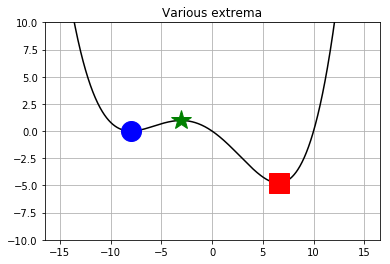

In [6]:
nonlinear_plots.extrema()

Of the three roots, two correspond to minima---but the left one (blue circle) is greater than the right one (red square), so is it really a minimum?  *Yes*, if we make the distinction between *local* and *global* minima.  For this problem, the right minimum is the *global* minimum, while the central root (green star) represents a local maximum ($f(x)$ is *unbounded*, i.e.,  there is no value $M < \infty$ such that $|f(x)| < M$ for all possible values of $x$).  Given the choice,  a global optimum is usualy preferred, but for many cases, we're at best guaranteed a local minimum.  There are techniques to increase our  chances of finding a global optimum, but that's outside the present scope!

### When the Derivative is Available

If we have $f(x)$ and can evaluated $f'(x)$, then either Newton's method or the secant method can be applied to $g(x)=f'(x) = 0$.  (The same goes for multi-variable problems).  In fact, this approach (among others) in built into `scipy.optimize.minimize`, which the reader should investigate.  

### When the Derivative is Unavailable

If we had $f'(x)$, we could apply Newton's method to $g(x) = f'(x) = 0$.  Assuming we don't, how to proceed?  One option is to adapt the bisection method.  Now, the search is not based on the change of the sign of $f(x)$ but rather it's magnitude relative to the left and right points.  Again, we have to have isolated our (single) target value in some finite range, which may be no easy task (plotting helps).  

## Further Reading

Checkout out the [SciPy documentation](https://docs.scipy.org/doc/scipy/reference/optimize.html) on optimization and root finding.